# API - application programming interface

## JSON - JavaScript Object Notation

In [2]:
import requests
import pandas as pd


In [3]:
url = 'https://swapi.dev/api/people/1/'

In [4]:
response = requests.get(url)

In [5]:
response.ok

True

In [6]:
response.json()

{'name': 'Luke Skywalker',
 'height': '172',
 'mass': '77',
 'hair_color': 'blond',
 'skin_color': 'fair',
 'eye_color': 'blue',
 'birth_year': '19BBY',
 'gender': 'male',
 'homeworld': 'https://swapi.dev/api/planets/1/',
 'films': ['https://swapi.dev/api/films/1/',
  'https://swapi.dev/api/films/2/',
  'https://swapi.dev/api/films/3/',
  'https://swapi.dev/api/films/6/'],
 'species': [],
 'vehicles': ['https://swapi.dev/api/vehicles/14/',
  'https://swapi.dev/api/vehicles/30/'],
 'starships': ['https://swapi.dev/api/starships/12/',
  'https://swapi.dev/api/starships/22/'],
 'created': '2014-12-09T13:50:51.644000Z',
 'edited': '2014-12-20T21:17:56.891000Z',
 'url': 'https://swapi.dev/api/people/1/'}

In [7]:
json = response.json()

In [8]:
json.keys()

dict_keys(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color', 'birth_year', 'gender', 'homeworld', 'films', 'species', 'vehicles', 'starships', 'created', 'edited', 'url'])

In [9]:
json['starships']

['https://swapi.dev/api/starships/12/', 'https://swapi.dev/api/starships/22/']

In [10]:
for ship in json['starships']:
    response = requests.get(ship)
    print(response.json()['name'])

X-wing
Imperial shuttle


In [11]:
base_url = 'https://swapi.dev/api/people/'

In [12]:
response = requests.get(base_url)

In [13]:
big_json = response.json()

In [14]:
names = []
height = []
mass = []

for i in range(1, 10):
    new_url = base_url + f'{i}/'
    response = requests.get(new_url)
    json = response.json()
    
    names.append(json['name'])
    height.append(json['height'])
    mass.append(json['mass'])
len(names), len(height), len(mass)

(9, 9, 9)

In [15]:
pd.DataFrame({'name' : names,
              'height': height,
              'mass': mass})

,name,height,mass
0,Luke Skywalker,172,77
1,C-3PO,167,75
2,R2-D2,96,32
3,Darth Vader,202,136
4,Leia Organa,150,49
5,Owen Lars,178,120
6,Beru Whitesun lars,165,75
7,R5-D4,97,32
8,Biggs Darklighter,183,84


In [16]:
import matplotlib.pyplot as plt


In [17]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
print(df.dtypes)
df.head()


date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [19]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

In [21]:
df['date'].dt.day

0       1
1       2
2       3
3       4
4       7
       ..
256    25
257    26
258    27
259    30
260    31
Name: date, Length: 261, dtype: int64

In [26]:
df['date'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
256    12
257    12
258    12
259    12
260    12
Name: date, Length: 261, dtype: int64

In [29]:
df['day_of_week'] = df['date'].dt.day_name()

In [30]:
df.head()

,date,coffee_consumption,day_of_week
0,2019-01-01,14.301915,Tuesday
1,2019-01-02,12.905900,Wednesday
2,2019-01-03,10.046015,Thursday
3,2019-01-04,6.354805,Friday
4,2019-01-07,8.545563,Monday


In [36]:
df = df.set_index('date')

In [37]:
df.head()

,coffee_consumption,day_of_week
date,,
2019-01-01,14.301915,Tuesday
2019-01-02,12.905900,Wednesday
2019-01-03,10.046015,Thursday
2019-01-04,6.354805,Friday
2019-01-07,8.545563,Monday


In [40]:
fill_df = df.asfreq('D')
fill_df.head()

,coffee_consumption,day_of_week
date,,
2019-01-01,14.301915,Tuesday
2019-01-02,12.905900,Wednesday
2019-01-03,10.046015,Thursday
2019-01-04,6.354805,Friday
2019-01-05,NaN,NaN


In [45]:
df.resample('Y').sum()

,coffee_consumption
date,
2019-12-31,2692.535209


In [46]:
df.resample('y').sum()

,coffee_consumption
date,
2019-12-31,2692.535209


In [47]:
fill_df.head()

,coffee_consumption,day_of_week
date,,
2019-01-01,14.301915,Tuesday
2019-01-02,12.905900,Wednesday
2019-01-03,10.046015,Thursday
2019-01-04,6.354805,Friday
2019-01-05,NaN,NaN


In [48]:
fill_df['forward'] = fill_df['coffee_consumption'].ffill()

In [49]:
fill_df['backward'] = fill_df['coffee_consumption'].bfill()

In [50]:
fill_df.head(10)

,coffee_consumption,day_of_week,forward,backward
date,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915
2019-01-02,12.905900,Wednesday,12.905900,12.905900
2019-01-03,10.046015,Thursday,10.046015,10.046015
2019-01-04,6.354805,Friday,6.354805,6.354805
2019-01-05,NaN,NaN,6.354805,8.545563
2019-01-06,NaN,NaN,6.354805,8.545563
2019-01-07,8.545563,Monday,8.545563,8.545563
2019-01-08,9.410101,Tuesday,9.410101,9.410101
2019-01-09,7.219271,Wednesday,7.219271,7.219271


In [51]:
fill_df['day_of_week'] = fill_df.index.day_name()
fill_df.head()

,coffee_consumption,day_of_week,forward,backward
date,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915
2019-01-02,12.905900,Wednesday,12.905900,12.905900
2019-01-03,10.046015,Thursday,10.046015,10.046015
2019-01-04,6.354805,Friday,6.354805,6.354805
2019-01-05,NaN,Saturday,6.354805,8.545563


In [54]:
fill_df['coffee_consumption'] = fill_df['coffee_consumption'].fillna(0)

In [55]:
fill_df.head(10)

,coffee_consumption,day_of_week,forward,backward
date,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915
2019-01-02,12.905900,Wednesday,12.905900,12.905900
2019-01-03,10.046015,Thursday,10.046015,10.046015
2019-01-04,6.354805,Friday,6.354805,6.354805
2019-01-05,0.000000,Saturday,6.354805,8.545563
2019-01-06,0.000000,Sunday,6.354805,8.545563
2019-01-07,8.545563,Monday,8.545563,8.545563
2019-01-08,9.410101,Tuesday,9.410101,9.410101
2019-01-09,7.219271,Wednesday,7.219271,7.219271


<AxesSubplot:xlabel='date'>

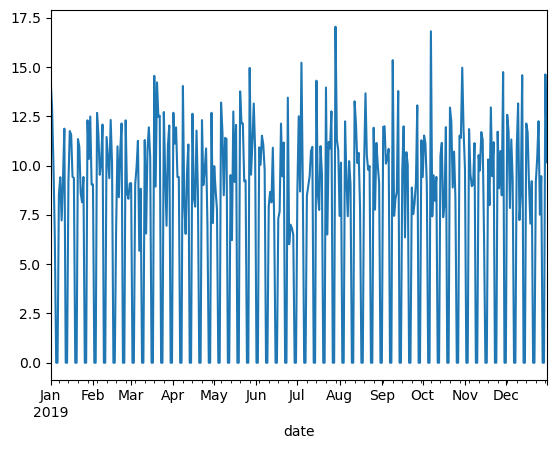

In [57]:
fill_df['coffee_consumption'].plot()

<AxesSubplot:xlabel='date'>

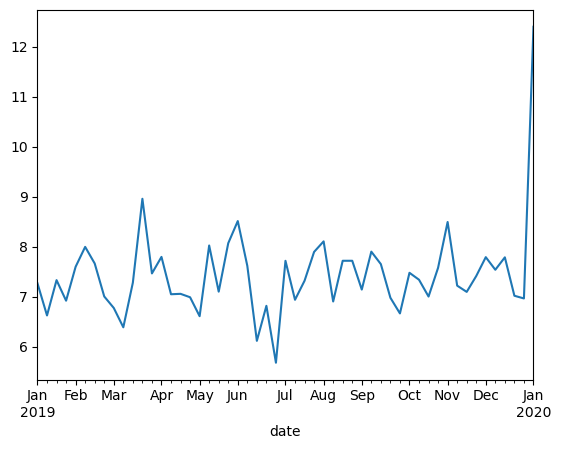

In [66]:
fill_df.resample('w').mean()['coffee_consumption'].plot()

In [68]:
fill_df['rolling_week_avg'] = fill_df['coffee_consumption'].rolling(7).mean()
fill_df.head(10)

,coffee_consumption,day_of_week,forward,backward,rolling_week_avg
date,,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915,NaN
2019-01-02,12.905900,Wednesday,12.905900,12.905900,NaN
2019-01-03,10.046015,Thursday,10.046015,10.046015,NaN
2019-01-04,6.354805,Friday,6.354805,6.354805,NaN
2019-01-05,0.000000,Saturday,6.354805,8.545563,NaN
2019-01-06,0.000000,Sunday,6.354805,8.545563,NaN
2019-01-07,8.545563,Monday,8.545563,8.545563,7.450600
2019-01-08,9.410101,Tuesday,9.410101,9.410101,6.751769
2019-01-09,7.219271,Wednesday,7.219271,7.219271,5.939394


In [69]:
fill_df.index.strftime('%A %B %Y')

Index(['Tuesday January 2019', 'Wednesday January 2019',
       'Thursday January 2019', 'Friday January 2019', 'Saturday January 2019',
       'Sunday January 2019', 'Monday January 2019', 'Tuesday January 2019',
       'Wednesday January 2019', 'Thursday January 2019',
       ...
       'Sunday December 2019', 'Monday December 2019', 'Tuesday December 2019',
       'Wednesday December 2019', 'Thursday December 2019',
       'Friday December 2019', 'Saturday December 2019',
       'Sunday December 2019', 'Monday December 2019',
       'Tuesday December 2019'],
      dtype='object', name='date', length=365)

In [71]:
fill_df.index.min(), fill_df.index.max()

(Timestamp('2019-01-01 00:00:00', freq='D'),
 Timestamp('2019-12-31 00:00:00', freq='D'))

In [74]:
fill_df.index.max() - fill_df.index.min() 

Timedelta('364 days 00:00:00')

In [79]:
fill_df['coffee_consumption'].idxmax()

Timestamp('2019-07-29 00:00:00', freq='D')

In [77]:
fill_df['coffee_consumption'].max()

17.0434447448351